<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AMES house Pricing data Analysis

Házi feladat
Regresszió az Ames House Prices dataset-en.

Vizualizáció, EDA
Adat tisztítás
Hiányzó adatok
Felesleges prediktorok
Hibás adatok
Változók transzformációja (normalizálás, numerikus formára hozás, stb)
Modell(ek) tanítása
Modellek kiértékelése, összehasonlítás
Beszámoló

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

Mounted at /content/drive


In [2]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 295kB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [3]:
import sweetviz as sw
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
df.head()


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [5]:
eda=sw.analyze(df,)

In [6]:
eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[SW](SWEETVIZ_REPORT.html)

In [7]:
!ls

drive  sample_data  SWEETVIZ_REPORT.html


In [41]:
from google.colab import files
#files.download("SWEETVIZ_REPORT.html")

### Adattisztitás
Adatelemzés

## Eladási Ár ellenőrzése

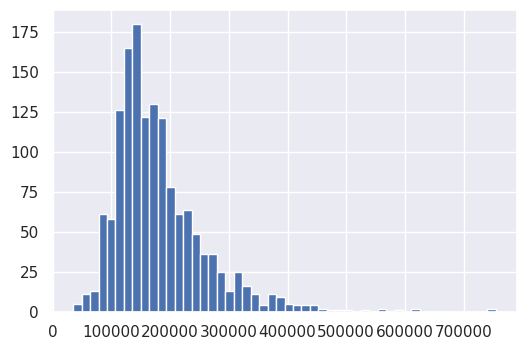

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [42]:
plt.hist(df["SalePrice"],50)
plt.show()
df["SalePrice"].describe()

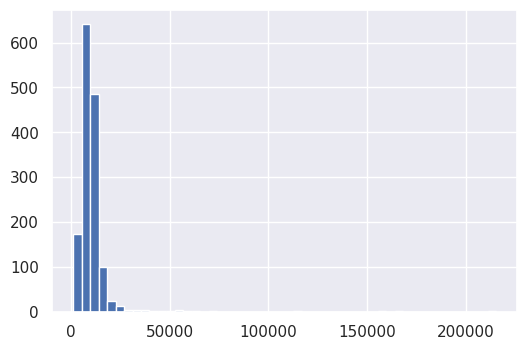

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [43]:
plt.hist(df["LotArea"],50)
plt.show()
df["LotArea"].describe()


215245 gyanús nagyon!!!

In [44]:
	heads=df.columns

In [45]:
print (heads)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [47]:
numcolumns=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrType',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',        'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd',  'Fireplaces',  'GarageYrBlt',  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',  'MiscVal', 'MoSold', 'YrSold',   'SalePrice']

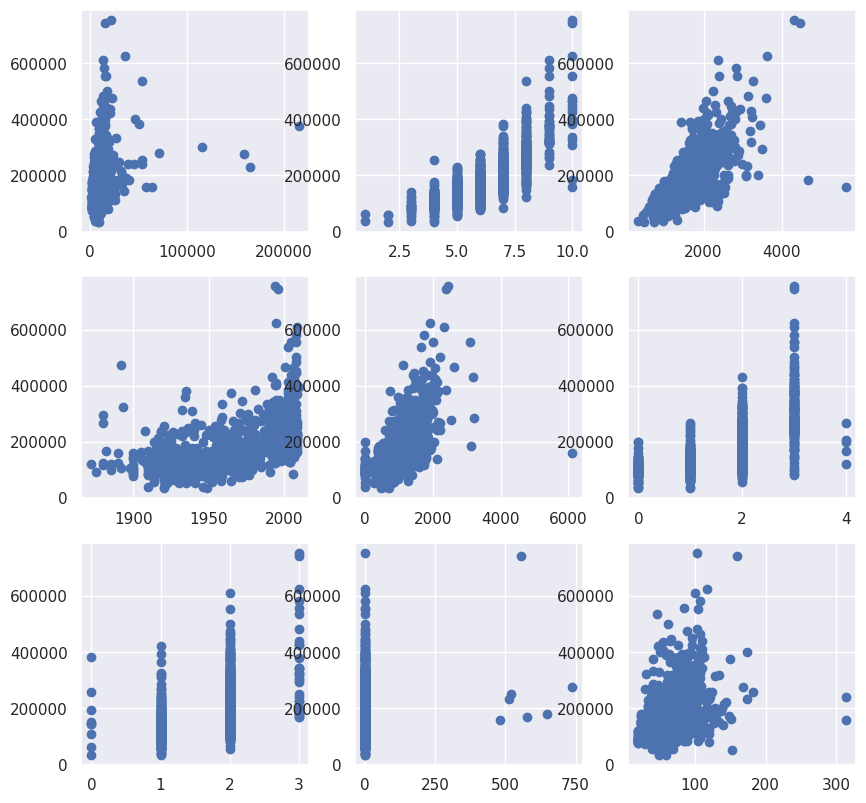

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.scatter(df["LotArea"],df["SalePrice"])
plt.subplot(332)
plt.scatter(df["OverallQual"],df["SalePrice"])
plt.subplot(333)
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.subplot(334)
plt.scatter(df["YearBuilt"],df["SalePrice"])
plt.subplot(335)
plt.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.subplot(336)
plt.scatter(df["GarageCars"],df["SalePrice"])
plt.subplot(337)
plt.scatter(df["FullBath"],df["SalePrice"])
plt.subplot(338)
plt.scatter(df["PoolArea"],df["SalePrice"])
plt.subplot(339)
plt.scatter(df["LotFrontage"],df["SalePrice"])
plt.show()

In [49]:

dfn=df[numcolumns]

In [50]:
dfn.head()

Id  MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450  ...        0       2    2008     208500
1   2          20         80.0     9600  ...        0       5    2007     181500
2   3          60         68.0    11250  ...        0       9    2008     223500
3   4          70         60.0     9550  ...        0       2    2006     140000
4   5          60         84.0    14260  ...        0      12    2008     250000

[5 rows x 40 columns]

In [51]:
correlacio=dfn.corr()

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

<Figure size 1000x1000 with 0 Axes>

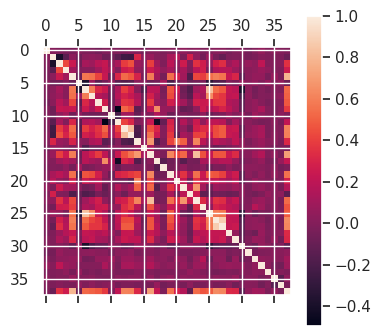

Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
SalePrice    -0.021917   -0.084284     0.351799  ...  0.046432 -0.028923   1.000000
OverallQual  -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
GrLivArea     0.008273    0.074853     0.402797  ...  0.050240 -0.036526   0.708624
GarageCars    0.016570   -0.040110     0.285691  ...  0.040522 -0.039117   0.640409
GarageArea    0.017634   -0.098672     0.344997  ...  0.027974 -0.027378   0.623431
TotalBsmtSF  -0.015415   -0.238518     0.392075  ...  0.013196 -0.014969   0.613581
1stFlrSF      0.010496   -0.251758     0.457181  ...  0.031372 -0.013604   0.605852
FullBath      0.005587    0.131608     0.198769  ...  0.055872 -0.019669   0.560664
TotRmsAbvGrd  0.027239    0.040380     0.352096  ...  0.036907 -0.034516   0.533723
YearBuilt    -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101

[11 rows x 38 columns]

In [52]:
print(correlacio)
plt.figure(figsize=(10,10))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
correlacio.nlargest(11,"SalePrice")

NUMERICAL ASSOCIATIONS
(PEARSON, -1 to 1)


* GrLivArea 0.71
* GarageArea 0.62
* TotalBsmtSF 0.61
* 1stFlrSF 0.61
* TotRmsAbvGrd 0.53
* YearBuilt 0.52
* YearRemodAdd 0.51
* GarageYrBlt 0.49
* MasVnrArea 0.48
* BsmtFinSF1 0.39
* LotFrontage 0.35
* WoodDeckSF 0.32
* 2ndFlrSF 0.32





In [53]:
kritical=["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

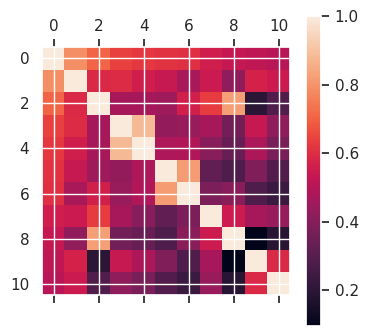

In [54]:
dfmax10=df[kritical]

CorM10=dfmax10.corr()


plt.matshow(CorM10)

plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


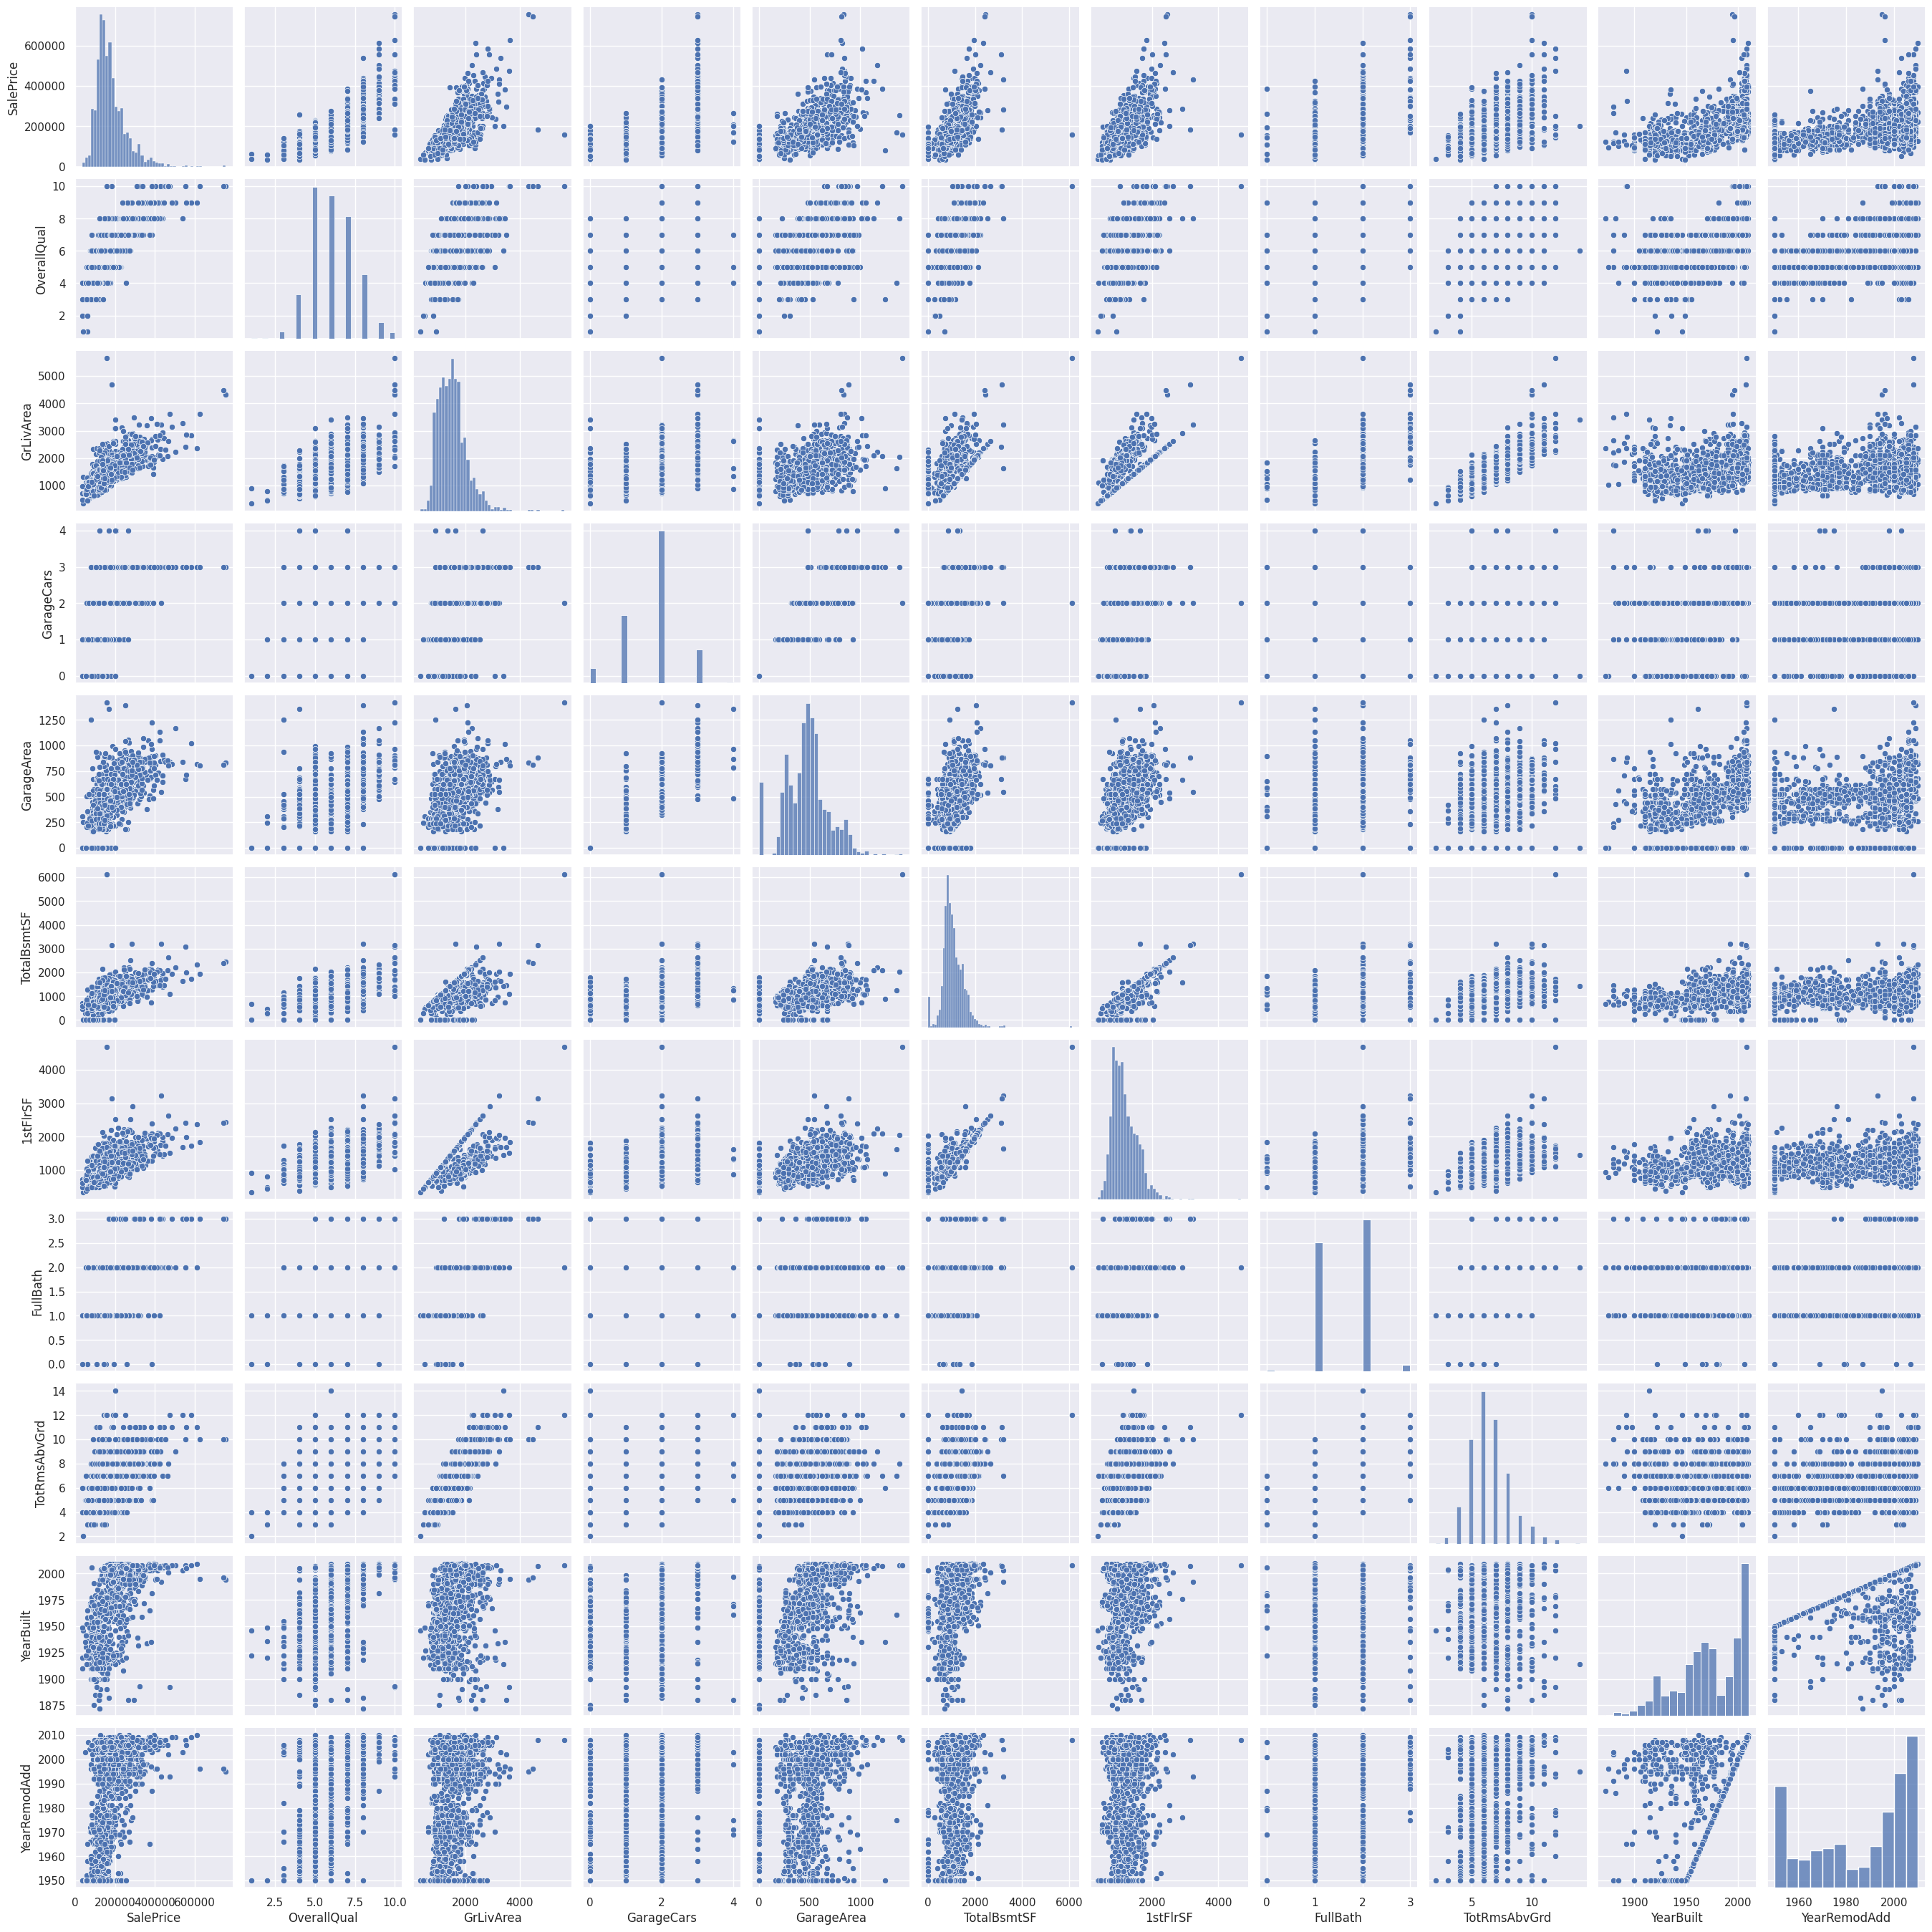

In [55]:
import seaborn as sns
sns.set()
sns.pairplot(df[kritical], size = 2.5)
plt.show();

In [56]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(df[kritical[1:]], df[kritical[0]])
lr.coef_

array([ 1.96045898e+04,  5.12971178e+01,  1.04179010e+04,  1.49475334e+01,
        1.98650991e+01,  1.41737355e+01, -6.79087146e+03,  3.31050771e+01,
        2.68240707e+02,  2.96481161e+02])

In [57]:
linpred=lr.predict(df[kritical[1:]])

linpred

array([214741.72468546, 169346.70949012, 220816.47032609, ...,
       227093.91227878, 126047.07735366, 136640.78777021])

In [58]:
diffi=(df["SalePrice"]-linpred)
print(diffi)

0       -6241.724685
1       12153.290510
2        2683.529674
3      -59794.211844
4      -32278.261233
            ...     
1455   -16896.289130
1456   -22731.061015
1457    39406.087721
1458    16077.922646
1459    10859.212230
Name: SalePrice, Length: 1460, dtype: float64


In [59]:
#print(diff)
linear_model_error=sum(list(diffi))
diffi.iloc[:]
df["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

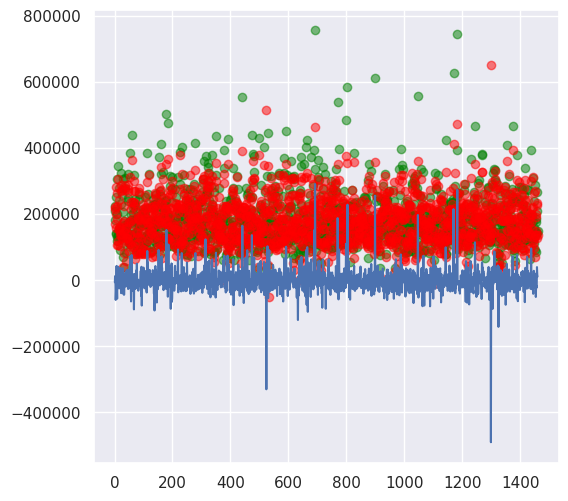

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],linpred[:],c="red",alpha=0.5)

plt.plot(df["Id"],diffi[:])
plt.show()

In [61]:
diffi.describe()

count    1.460000e+03
mean    -5.948345e-11
std      3.779219e+04
min     -4.899578e+05
25%     -1.931615e+04
50%     -1.948119e+03
75%      1.601953e+04
max      2.905582e+05
Name: SalePrice, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f33c77d6128>],
 'caps': [<matplotlib.lines.Line2D at 0x7f33c77d6be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33c77c4748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f33c77c4390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f33c77d6470>,
  <matplotlib.lines.Line2D at 0x7f33c77d6828>]}

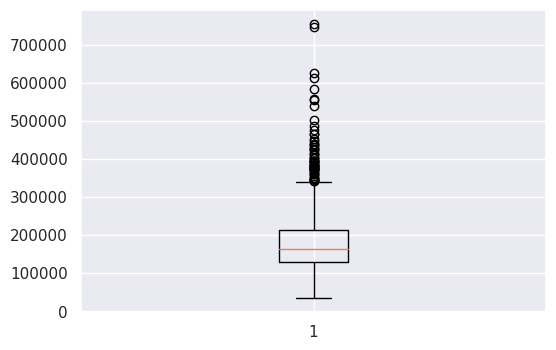

In [62]:
#nézzunk boxplotot


plt.boxplot(df["SalePrice"],)

In [63]:
huberreg=linear_model.HuberRegressor(max_iter=400)
huberreg.fit(df[kritical[1:]], df[kritical[0]])
huberreg.coef_

array([ 1.92312710e+04,  5.10320646e+01,  3.10812904e+03,  4.48499331e+01,
        3.05264434e+01,  6.01281207e+00,  3.29106157e+03, -2.27091676e+03,
        7.57721662e+01, -1.11314760e+02])

In [64]:
hubpred=huberreg.predict(df[kritical[1:]])
print(hubpred)
diffihubert=(df["SalePrice"]-hubpred)

[200856.29555093 175152.28679845 214265.84474256 ... 220352.13251168
 121616.26225069 141134.97812448]


In [65]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(max_iter=400,alpha=0.1,normalize=True)
lassoreg.fit(df[kritical[1:]], df[kritical[0]])
lassoreg.coef_

array([ 1.96046395e+04,  5.12852185e+01,  1.04166803e+04,  1.49491581e+01,
        1.98671967e+01,  1.41688139e+01, -6.76080817e+03,  2.95475338e+01,
        2.68000558e+02,  2.96312510e+02])

In [66]:
lassopred=lassoreg.predict(df[kritical[1:]])
print(lassopred)
diffilasso=(df["SalePrice"]-lassopred)

[214737.50252065 169364.63164256 220819.02459558 ... 227092.7459849
 126044.88724069 136634.10381476]


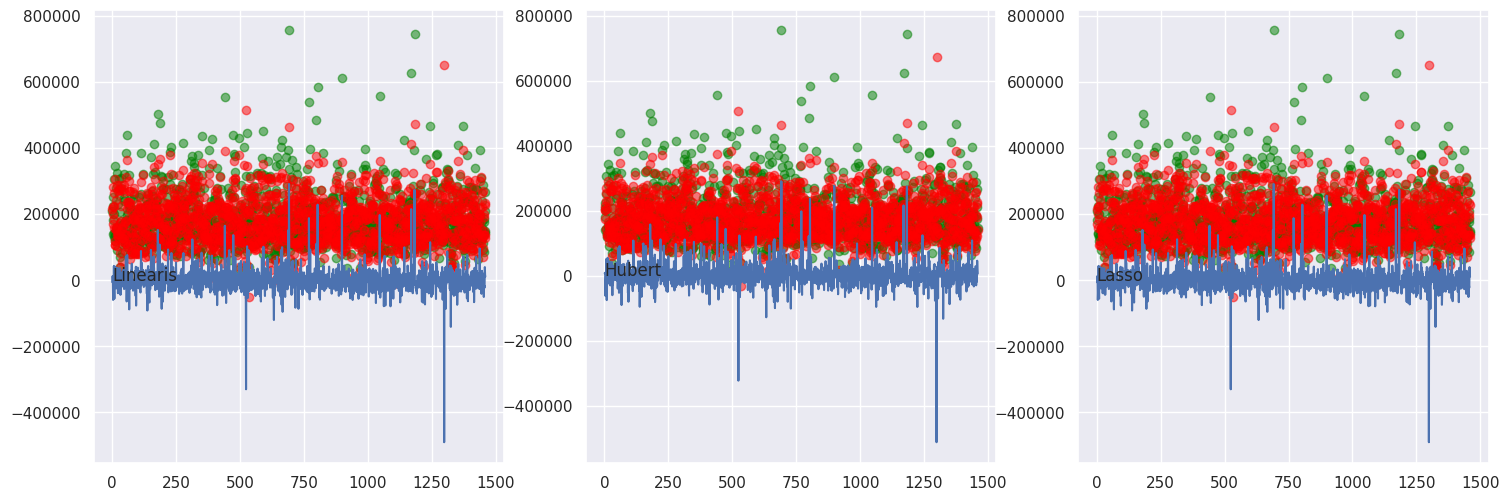

In [67]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],linpred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffi[:])
plt.text(0,0,"Linearis")


plt.subplot(132)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],hubpred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert")


plt.subplot(133)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],lassopred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffilasso[:])
plt.text(0,0,"Lasso")



plt.show()

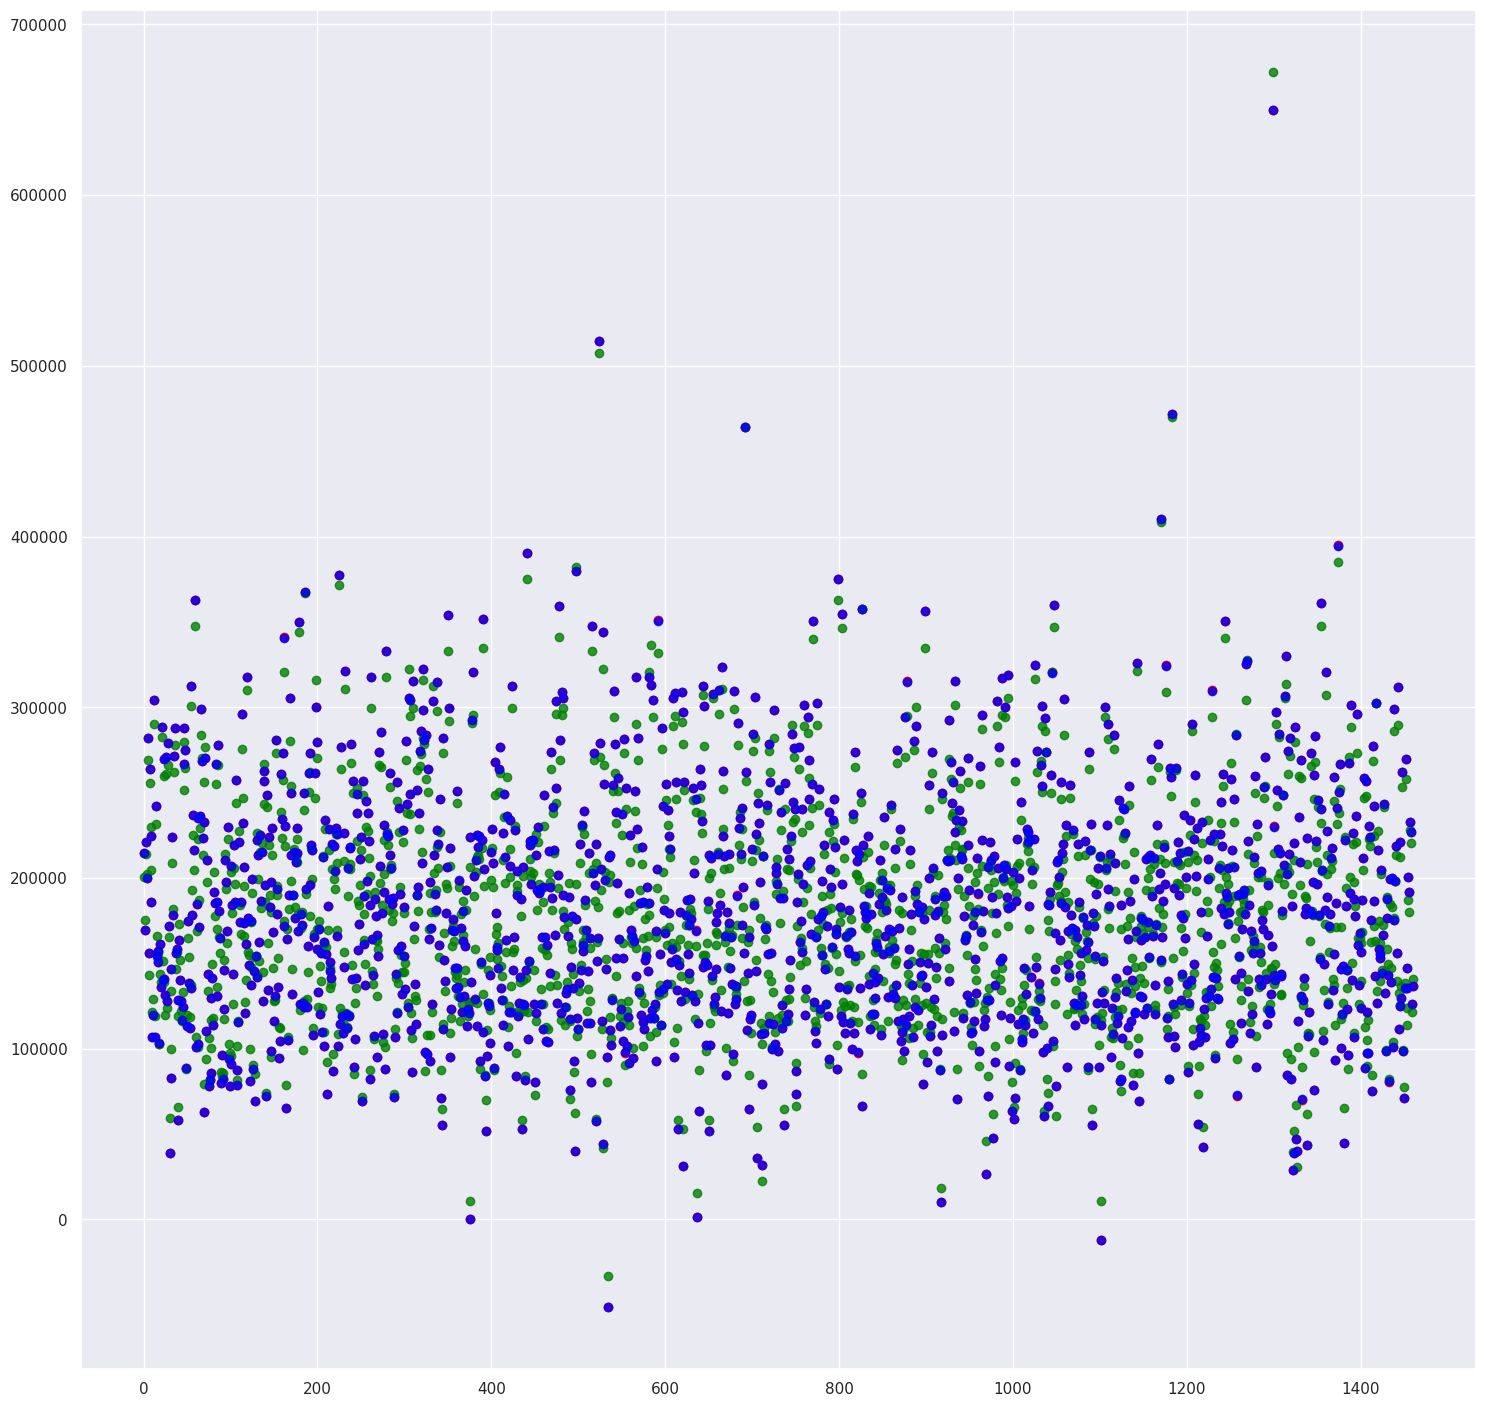

In [68]:
#NAgyon egyforma itt minden....

plt.figure(figsize=(18,18))
plt.subplot(111)

plt.scatter(df["Id"],linpred[:],c="red",alpha=1)
#plt.plot(df["Id"],diffi[:])




plt.scatter(df["Id"],hubpred[:],c="green",alpha=0.8)
#plt.plot(df["Id"],diffihubert[:])




plt.scatter(df["Id"],lassopred[:],c="blue",alpha=0.8,marker="o")
#plt.plot(df["Id"],diffilasso[:])



plt.show()





---



---


# **Vannak kiugró értékek Nézzünk Outliereket!**




In [69]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
df_kritikus=df[kritical]
y_pred = clf.fit_predict(df_kritikus)

In [70]:
df_kritikus_no_outliers=df_kritikus
#print(df_kritikus.head())
indexer=[]
print(df_kritikus.size)
for index,i in enumerate(y_pred):
    #print(index,"##",i,end=" ")
    
    if i==-1:
        print(index,"--",i)
        df_kritikus_no_outliers=df_kritikus_no_outliers.drop([index])
    else:
        indexer.append(index)
        
print(df_kritikus_no_outliers.size)


16060
30 -- -1
66 -- -1
90 -- -1
102 -- -1
113 -- -1
144 -- -1
156 -- -1
182 -- -1
250 -- -1
264 -- -1
330 -- -1
371 -- -1
383 -- -1
440 -- -1
445 -- -1
495 -- -1
523 -- -1
533 -- -1
614 -- -1
662 -- -1
666 -- -1
691 -- -1
728 -- -1
769 -- -1
778 -- -1
803 -- -1
843 -- -1
894 -- -1
897 -- -1
898 -- -1
915 -- -1
916 -- -1
921 -- -1
968 -- -1
984 -- -1
1045 -- -1
1046 -- -1
1048 -- -1
1169 -- -1
1182 -- -1
1223 -- -1
1298 -- -1
1319 -- -1
1324 -- -1
1336 -- -1
15565


## **Nézzük mit csináltunk az outlier separációval**

In [74]:
df_kritikus_no_outliers.head()

SalePrice  OverallQual  GrLivArea  ...  TotRmsAbvGrd  YearBuilt  YearRemodAdd
0     208500            7       1710  ...             8       2003          2003
1     181500            6       1262  ...             6       1976          1976
2     223500            7       1786  ...             6       2001          2002
3     140000            7       1717  ...             7       1915          1970
4     250000            8       2198  ...             9       2000          2000

[5 rows x 11 columns]

In [75]:
huberreg=linear_model.HuberRegressor(max_iter=400)
huberreg.fit(df_kritikus_no_outliers[kritical[1:]], df_kritikus_no_outliers[kritical[0]])
print(huberreg.coef_)
hubpred_no_outliers=huberreg.predict(df_kritikus_no_outliers[kritical[1:]])
print(hubpred_no_outliers)
#diffihubert_no_outliers=(df["SalePrice"]-hubpred_no_outliers)

print(len(indexer))

[ 1.86834498e+04  5.07421588e+01  2.78016406e+03  4.53468327e+01
  3.21165933e+01  7.00624191e+00  3.33139113e+03 -2.04888713e+03
  7.03535754e+01 -1.05896200e+02]
[200211.06053736 175745.89855237 213355.09932429 ... 221079.88057615
 122541.20168704 142458.85529963]
1415


Text(0, 0, 'Hubert')

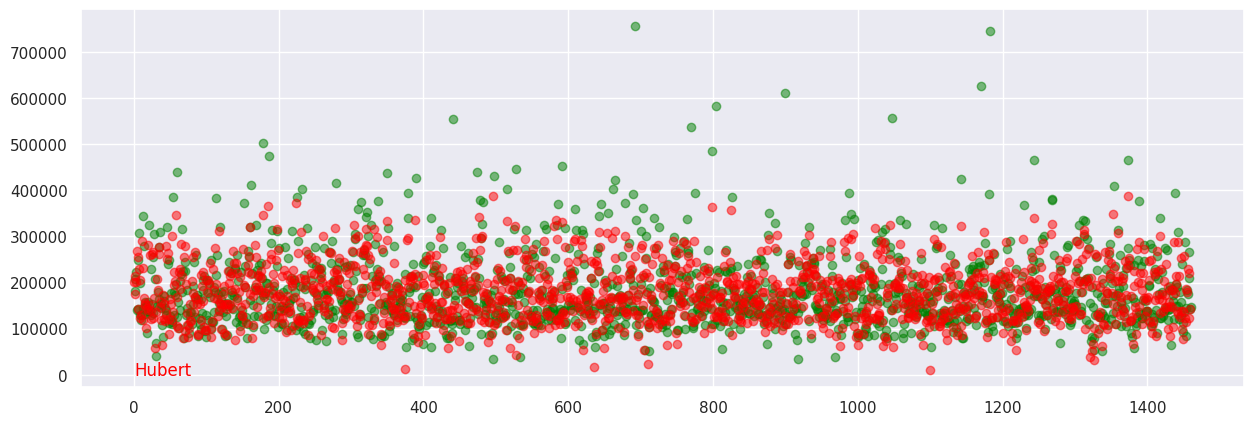

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")


# **A sweetViz Mást mutat**
CATEGORICAL ASSOCIATIONS
(CORRELATION RATIO, 0 to 1)
* OverallQual 0.83
*  **Neighborhood 0.74**
* GarageCars 0.70
* **ExterQual** 0.69
* **BsmtQual**0.68
* **KitchenQual** 0.68
* FullBath 0.58
* **GarageFinish** 0.55
* **FireplaceQu** 0.54
* **Foundation** 0.51
* GarageType 0.50
* Fireplaces 0.48
* BsmtFinType1 0.46
* HeatingQC 0.44





# **Adattisztítás**

In [77]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

#correlationMAt=df.corr()
#print(correlationMAt)

In [78]:
a=set(df["Neighborhood"])
#print(a)
#df.mean()
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
#print(salePrice_by_Neighborhood)

#print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
#print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
#print(dfs)
dfs2=dfs.sort_values(0)
#print(dfs2)
dfs2_enum=dfs2.index
rangsor={i:index for index,i in enumerate(dfs2_enum)}
print(rangsor)

{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


**És megvan a kerületek rangsora... :-)**

# **Tegyük bele a Dataframe-be **

In [79]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()
for i in df.index:
    df.at[i,"Neighborhood"]=rangsor[df.iloc[i]["Neighborhood"]]
#print(df["Neighborhood"])  kiírjuk, hogy számok lettek -e

# Adattisztítás: **KitchenQual**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor




In [80]:
key={"Ex":4, "Gd":3, "TA":2,"Fa":1,"Po":0}
idx="KitchenQual"
for i in df.index:
    df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# Adattisztítás: **ExterQual**
* Ex Excellent
* Gd Good
* TA Typical/Average
* Fa Fair
* Po Poor

In [81]:
key={"Ex":4, "Gd":3, "TA":2,"Fa":1,"Po":0}
idx="ExterQual"
for i in df.index:
    df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# **BsmtQual: Evaluates the height of the basement**

* Ex	Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement

In [82]:
key={"Ex":5, "Gd":4, "TA":3,"Fa":2,"Po":1, "NA":0}
idx="BsmtQual"
df[idx]=df[idx].fillna(0)
for i in df.index:
    #print(i)
    if  df.at[i,idx]==0:
        df.at[i,idx]=0
    else:
        df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# Adattisztítás: **FireplaceQu**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor
* No Fireplace


In [83]:


key={"Ex":5, "Gd":4, "TA":3,"Fa":2,"Po":1,"NA":0, "NaN":0}
idx="FireplaceQu"
df[idx]=df[idx].fillna(0)
for i in df.index:
    #print(i)
    if  df.at[i,idx]==0:
        df.at[i,idx]=0
    else:
        df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [84]:


key={"BrkTil":6, "CBlock":5,"PConc":4,"Slab":3,"Stone":2, "Wood":1}
idx="Foundation"
#df[idx]=df[idx].fillna(0)
for i in df.index:
    #print(i)
    if  df.at[i,idx]==0:
        df.at[i,idx]=0
    else:
        df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [85]:

key={"Ex":5, "Gd":4, "TA":3,"Fa":2,"Po":1,"NA":0, "NaN":0}

idx="GarageQual"
df[idx]=df[idx].fillna(0)
for i in df.index:
    #print(i)
    if  df.at[i,idx]==0:
        df.at[i,idx]=0
    else:
        df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

# **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [86]:
key={"Fin":3,"RFn":2,"Unf":1,"NA":0, "NaN":0}

idx="GarageFinish"
df[idx]=df[idx].fillna(0)
for i in df.index:
    #print(i)
    if  df.at[i,idx]==0:
        df.at[i,idx]=0
    else:
        df.at[i,idx]=key[df.at[i,idx]]
#print(df[idx])

In [87]:
kritical=["SalePrice","Neighborhood","GarageFinish","GarageQual","Foundation",
          "FireplaceQu","BsmtQual","ExterQual","KitchenQual",
          "OverallQual","GrLivArea","GarageCars",
          "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
          "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

df["Neighborhood"]=pd.to_numeric(df["Neighborhood"])
df["GarageFinish"]=pd.to_numeric(df["GarageFinish"])
df["GarageQual"]=pd.to_numeric(df["GarageQual"])
df["Foundation"]=pd.to_numeric(df["Foundation"])
df["FireplaceQu"]=pd.to_numeric(df["FireplaceQu"])
df["BsmtQual"]=pd.to_numeric(df["BsmtQual"])
df["ExterQual"]=pd.to_numeric(df["ExterQual"])
df["KitchenQual"]=pd.to_numeric(df["KitchenQual"])





#df[""]=pd.to_numeric(df[""])

In [88]:
df.to_csv("/content/drive/My Drive/001_AI/05_AI/hazi/Data_cleaned.csv")

In [89]:

corr=df.corr()
#print(corr)
corr=corr.sort_values("SalePrice",ascending=False)
print (corr)
X=corr.index
print(X)

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
SalePrice     -0.021917   -0.084284     0.351799  ...  0.046432 -0.028923   1.000000
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
GrLivArea      0.008273    0.074853     0.402797  ...  0.050240 -0.036526   0.708624
Neighborhood   0.000058   -0.055582     0.250935  ...  0.054886 -0.028672   0.696882
ExterQual      0.005039    0.016178     0.178993  ...  0.042790 -0.006745   0.682639
KitchenQual    0.014973   -0.012383     0.181839  ...  0.051762  0.002047   0.659600
GarageCars     0.016570   -0.040110     0.285691  ...  0.040522 -0.039117   0.640409
GarageArea     0.017634   -0.098672     0.344997  ...  0.027974 -0.027378   0.623431
TotalBsmtSF   -0.015415   -0.238518     0.392075  ...  0.013196 -0.014969   0.613581
1stFlrSF       0.010496   -0.251758     0.457181  ...  0.031372 -0.013604   0.605852
BsmtQual      -0.028425    0.051122     0.152570  ...  0.015662 -

['SalePrice']
['SalePrice']


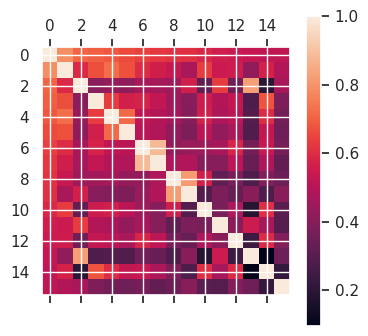

In [90]:
Correlacion_number=16

Price=[X[0]]
print(Price)
X_CN=list(X[1:Correlacion_number])
All_Variable=Price+X_CN

print(Price)
dfmax10=df[All_Variable]

CorM10=dfmax10.corr()


plt.matshow(CorM10)

plt.colorbar()
plt.show()



Ide majd kellene csináni egy franko 4#4 és anyagot

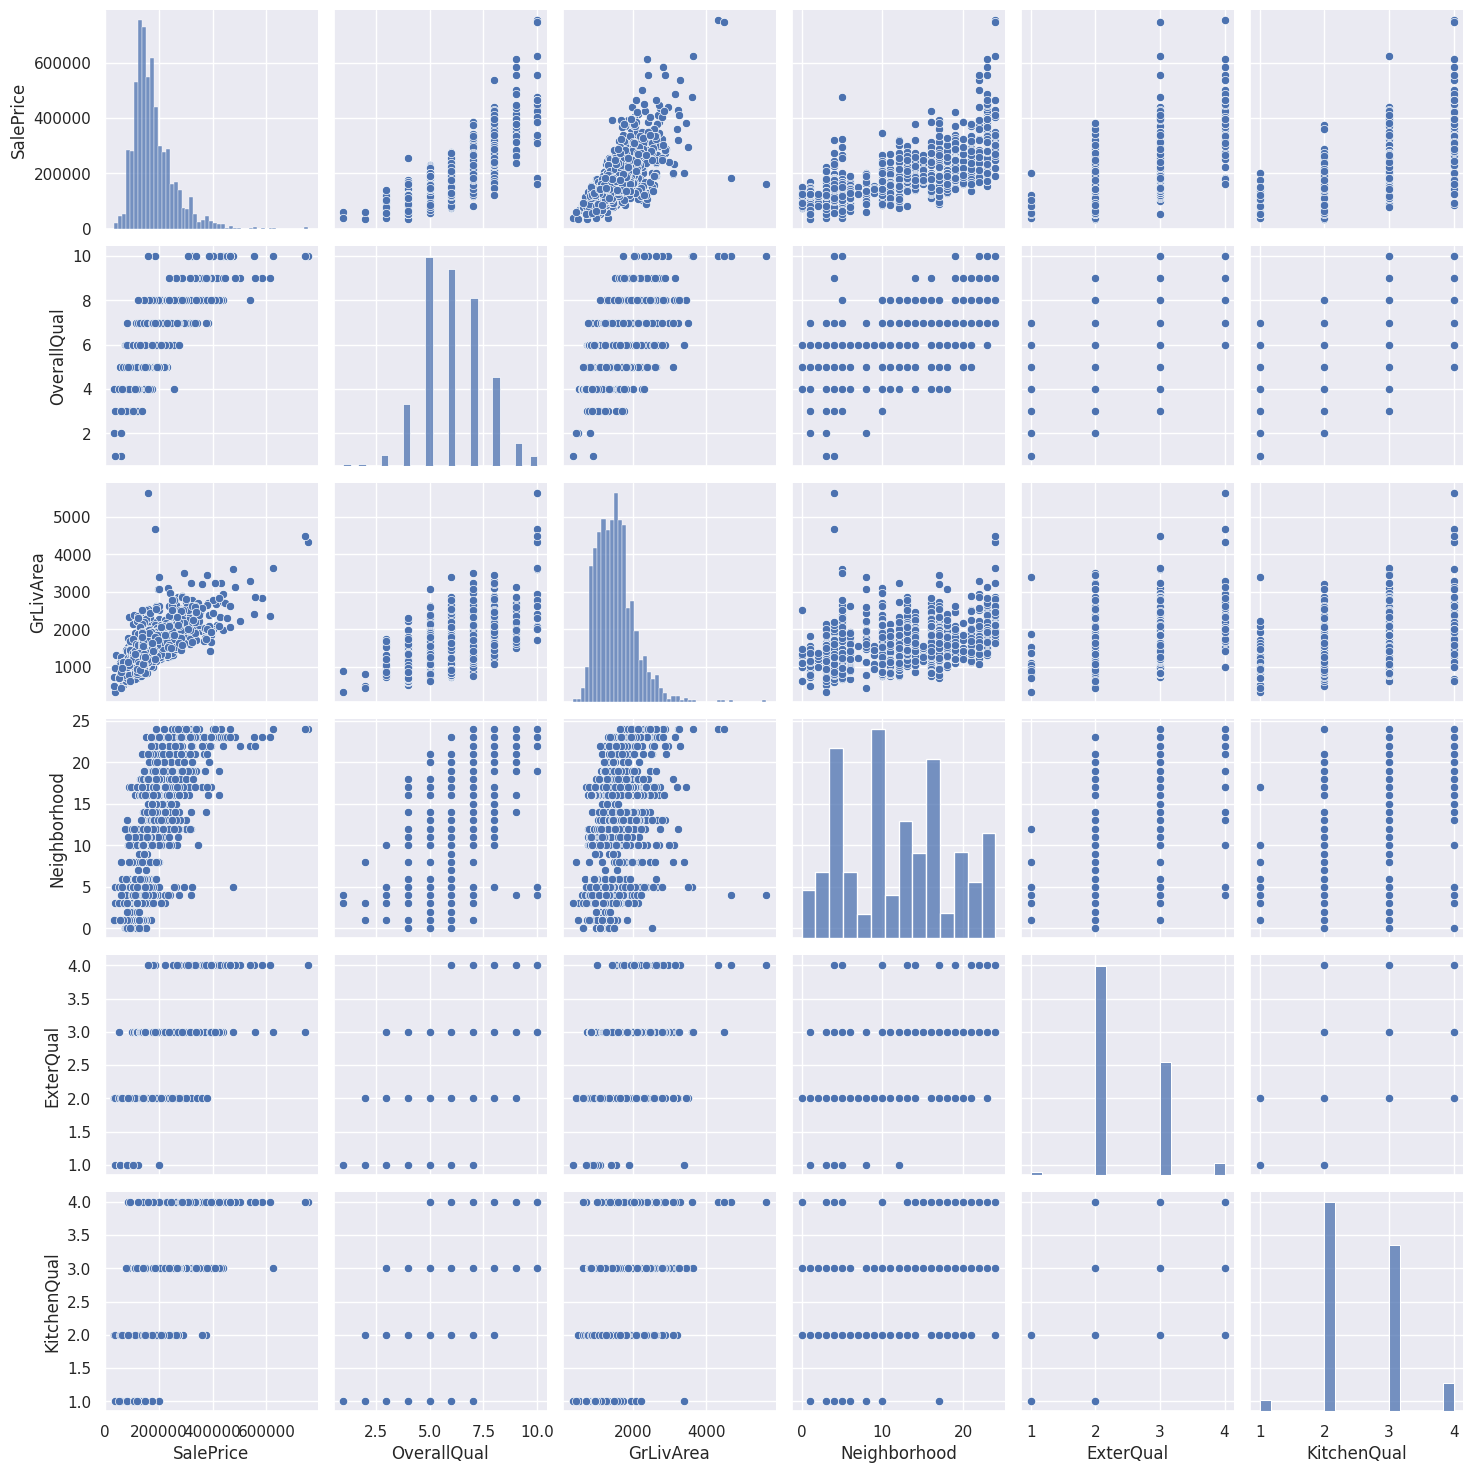

In [91]:
import seaborn as sns
sns.set()

sns.pairplot(df[All_Variable[:6]], height = 2.5)
plt.show();

Check NAN values


In [92]:
for i in All_Variable:
    print(df[i].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


# **OLUTLIER DETECTION**

In [93]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
df_kritikus=df[All_Variable]
y_pred = clf.fit_predict(df_kritikus)


df_kritikus_no_outliers=df_kritikus
#print(df_kritikus.head())
indexer=[]
print(df_kritikus.size)
print(y_pred)
for index,i in enumerate(y_pred):
    #print(index,"##",i,end=" ")
    
    if i==-1:
        print(index,"--",i)
        df_kritikus_no_outliers=df_kritikus_no_outliers.drop([index])
    else:
        indexer.append(index)
        
print(df_kritikus_no_outliers.size)

23360
[1 1 1 ... 1 1 1]
33 -- -1
54 -- -1
61 -- -1
66 -- -1
78 -- -1
90 -- -1
93 -- -1
102 -- -1
103 -- -1
144 -- -1
156 -- -1
174 -- -1
182 -- -1
198 -- -1
231 -- -1
241 -- -1
247 -- -1
273 -- -1
330 -- -1
362 -- -1
371 -- -1
399 -- -1
445 -- -1
488 -- -1
515 -- -1
516 -- -1
523 -- -1
529 -- -1
577 -- -1
593 -- -1
635 -- -1
656 -- -1
661 -- -1
662 -- -1
666 -- -1
677 -- -1
691 -- -1
728 -- -1
740 -- -1
761 -- -1
767 -- -1
778 -- -1
783 -- -1
801 -- -1
809 -- -1
826 -- -1
829 -- -1
843 -- -1
868 -- -1
883 -- -1
885 -- -1
888 -- -1
892 -- -1
894 -- -1
897 -- -1
913 -- -1
921 -- -1
969 -- -1
984 -- -1
1011 -- -1
1027 -- -1
1031 -- -1
1040 -- -1
1045 -- -1
1048 -- -1
1061 -- -1
1063 -- -1
1065 -- -1
1068 -- -1
1126 -- -1
1129 -- -1
1130 -- -1
1154 -- -1
1172 -- -1
1173 -- -1
1182 -- -1
1183 -- -1
1208 -- -1
1223 -- -1
1230 -- -1
1292 -- -1
1298 -- -1
1319 -- -1
1324 -- -1
1336 -- -1
1365 -- -1
1371 -- -1
1391 -- -1
1396 -- -1
1435 -- -1
1440 -- -1
21904


In [96]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
df_regr=df_kritikus_no_outliers
numofvariables=15
kritical=All_Variable

lr = linear_model.LinearRegression()
lr.fit(df_regr[kritical[1:numofvariables]], df_regr[kritical[0]])
print("Linear reg koefficiensei:",lr.coef_)

huberreg=linear_model.HuberRegressor(max_iter=400)
huberreg.fit(df_regr[kritical[1:numofvariables]], df_regr[kritical[0]])
print("Hubert reg koefficiensei:",huberreg.coef_)

from sklearn.linear_model import Lasso
lassoreg=Lasso(max_iter=400,alpha=0.1,normalize=True)
lassoreg.fit(df_regr[kritical[1:numofvariables]], df_regr[kritical[0]])
print("Lasso reg koefficiensei:",lassoreg.coef_)

#Ransac
ransacreg = linear_model.RANSACRegressor()
ransacreg.fit(df_regr[kritical[1:numofvariables]], df_regr[kritical[0]])
#print("Ransac reg koefficiensei:",ransacreg.coef_)
#print(ransacreg.ou)

Linear reg koefficiensei: [ 9598.02460101    55.74583073  1596.81838825 11077.03546186
 10781.94231511 -1007.57539617    35.79247652    23.34787894
    20.43509828  4854.95988571 -9258.79402457  2287.98894639
  1123.65664353    59.52085957]
Hubert reg koefficiensei: [ 8996.7474832     49.89933533  1758.02246862  6853.16032369
 10410.83118518   -50.10203206    35.47395033    16.0078567
    19.88733361  4650.0427601  -3951.30596057  3117.5871183
   264.57760048   -44.32885705]
Lasso reg koefficiensei: [ 9597.62101123    55.7377519   1596.60034109 11075.83598416
 10780.35024951  -953.2234831     35.65074515    23.35646731
    20.42725744  4851.58269876 -9234.93212768  2281.78301836
  1118.26128894    59.22945609]


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

# **Predikció**

In [97]:
linpred=lr.predict(df_regr[kritical[1:numofvariables]])
diffi=(df_regr["SalePrice"]-linpred)

hubpred=huberreg.predict(df_regr[kritical[1:numofvariables]])
print(hubpred)
diffihubert=(df_regr["SalePrice"]-hubpred)

lassopred=lassoreg.predict(df_regr[kritical[1:numofvariables]])
print(lassopred)
diffilasso=(df_regr["SalePrice"]-lassopred)

ransacpred=ransacreg.predict(df_regr[kritical[1:numofvariables]])
print(ransacpred)

[208392.03781346 178927.95004402 216169.61901125 ... 247693.45891824
 136293.09806694 144570.5991508 ]
[214512.54809631 175277.83815049 221334.8388442  ... 258990.18714518
 134736.01108597 151020.41361148]
[211956.49978092 183434.88985731 214342.15017958 ... 257611.19841513
 134906.02012133 138692.90856082]


# **Grafika**

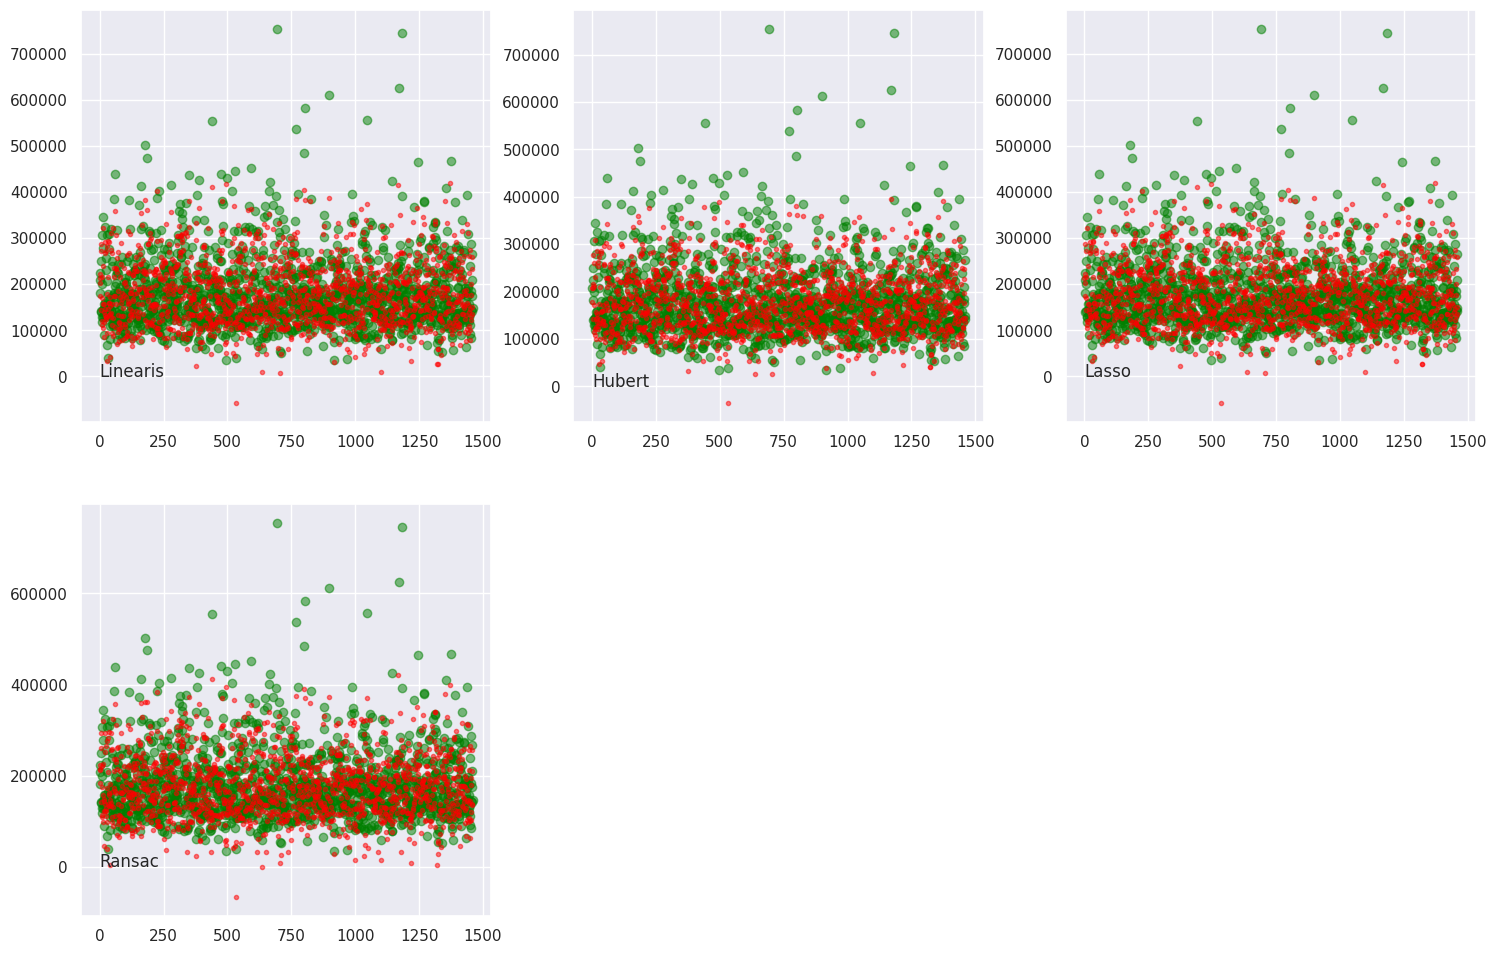

In [98]:
plt.figure(figsize=(18,12))
plt.subplot(231)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(indexer,linpred[:],c="red",alpha=0.5,marker=".")

plt.text(0,0,"Linearis")


plt.subplot(232)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(indexer,hubpred[:],c="red",alpha=0.5,marker=".")

plt.text(0,0,"Hubert")


plt.subplot(233)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5,)
plt.scatter(indexer,lassopred[:],c="red",alpha=0.5,marker=".")

plt.text(0,0,"Lasso")

plt.subplot(234)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5,)
plt.scatter(indexer,ransacpred[:],c="red",alpha=0.5,marker=".")

plt.text(0,0,"Ransac")


plt.show()

# **Vajon talált a ransac még outliert?**

In [99]:
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
count=0
countT=0
countF=0
for i in inlier_mask:
    if i:
        print("#",end="")
        countT+=1
    else:
        print("O",end="")
        countF+=1
    count+=1
    if count == 50:
        count=0
        print("\n", end="")

print(f"\n\n\nA Ransac módszer kidobált még {countF} darab adatot a {countT+countF} darabból !! ")

###OO#O#O###OO###O#####O#####OO#######O###########
#OO#O#O##O#####O#O###OO#######O####O##############
###O####O###################O##O#O#######O######O#
##O#O########O##O##O##O###########O#O#######O##O##
####O#####################O######O########O#OO####
#O########OO######O##########################O####
O####O#######O###O###O#O#####O##O######O#####O####
####O#OO####OO####O##OO########O#OO##OO######O####
####O####O##O#####O#####O#O#O####OO############O#O
O####O##OO#####OO###O########O#O###########OO#####
OO##OO##O#O##O######O####O###########OO#O#O###O###
##OO##O#OO##O####O#########OO#####O#############O#
OOO##O#######O#O##O######OO##OO##O#######OO######O
##O########O######OO###O#OO##O######OO#O########O#
O###OO####O#########O######OOO###O##O########OO###
#####O###O###O########O###########################
####O#######O####O#O###O##O####OO####O###O#O######
#####O#############OO##O###O#####O#O#OO########OO#
##OO##OO#####O#OO#O#########O###O###O####O##O#####
#######O##O############O##OO###

# **Vajon a Normalizáció Mit okoz?**

In [110]:
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/Data_cleaned.csv")
df.head()

Unnamed: 0  Id  MSSubClass  ... SaleType  SaleCondition  SalePrice
0           0   1          60  ...       WD         Normal     208500
1           1   2          20  ...       WD         Normal     181500
2           2   3          60  ...       WD         Normal     223500
3           3   4          70  ...       WD        Abnorml     140000
4           4   5          60  ...       WD         Normal     250000

[5 rows x 82 columns]

               Unnamed: 0        Id  MSSubClass  ...    MoSold    YrSold  SalePrice
SalePrice       -0.021917 -0.021917   -0.084284  ...  0.046432 -0.028923   1.000000
OverallQual     -0.028365 -0.028365    0.032628  ...  0.070815 -0.027347   0.790982
GrLivArea        0.008273  0.008273    0.074853  ...  0.050240 -0.036526   0.708624
Neighborhood     0.000058  0.000058   -0.055582  ...  0.054886 -0.028672   0.696882
ExterQual        0.005039  0.005039    0.016178  ...  0.042790 -0.006745   0.682639
KitchenQual      0.014973  0.014973   -0.012383  ...  0.051762  0.002047   0.659600
GarageCars       0.016570  0.016570   -0.040110  ...  0.040522 -0.039117   0.640409
GarageArea       0.017634  0.017634   -0.098672  ...  0.027974 -0.027378   0.623431
TotalBsmtSF     -0.015415 -0.015415   -0.238518  ...  0.013196 -0.014969   0.613581
1stFlrSF         0.010496  0.010496   -0.251758  ...  0.031372 -0.013604   0.605852
BsmtQual        -0.028425 -0.028425    0.051122  ...  0.015662 -0.021461   0

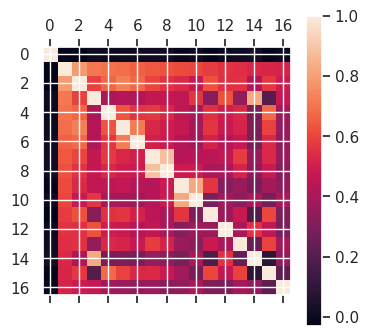

In [111]:

corr=df.corr()
#print(corr)
corr=corr.sort_values("SalePrice",ascending=False)
print (corr)
X=corr.index
print(X)



Correlacion_number=16

Price=[X[0]]
print(Price)
X_CN=list(X[1:Correlacion_number])
All_Variable=["Id"]+Price+X_CN

print(Price)
dfmax10=df[All_Variable]

CorM10=dfmax10.corr()


plt.matshow(CorM10)

plt.colorbar()
plt.show()



In [112]:
print(All_Variable)

['Id', 'SalePrice', 'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu']


In [113]:
df_minimal=df[All_Variable]
print(df_minimal.head())


   Id  SalePrice  OverallQual  ...  TotRmsAbvGrd  YearBuilt  FireplaceQu
0   1     208500            7  ...             8       2003            0
1   2     181500            6  ...             6       1976            3
2   3     223500            7  ...             6       2001            3
3   4     140000            7  ...             7       1915            4
4   5     250000            8  ...             9       2000            3

[5 rows x 17 columns]


# **Normalizáció 0-1 tartományra**

In [114]:
df_norm=(df_minimal-df_minimal.min())/(df_minimal.max()-df_minimal.min())
df_norm["SalePrice"]=df_minimal["SalePrice"]
df_norm["Id"]=df_minimal["Id"]

df_norm.head()

Id  SalePrice  OverallQual  ...  TotRmsAbvGrd  YearBuilt  FireplaceQu
0   1     208500     0.666667  ...      0.500000   0.949275          0.0
1   2     181500     0.555556  ...      0.333333   0.753623          0.6
2   3     223500     0.666667  ...      0.333333   0.934783          0.6
3   4     140000     0.666667  ...      0.416667   0.311594          0.8
4   5     250000     0.777778  ...      0.583333   0.927536          0.6

[5 rows x 17 columns]

In [105]:
#df_norm.to_csv("/content/drive/My Drive/001_AI/05_AI/hazi/Data_Normalized.csv")

# **RaNSAC MÓDSZERREL PRÓBÁLKOZZUNK**

1460
1460


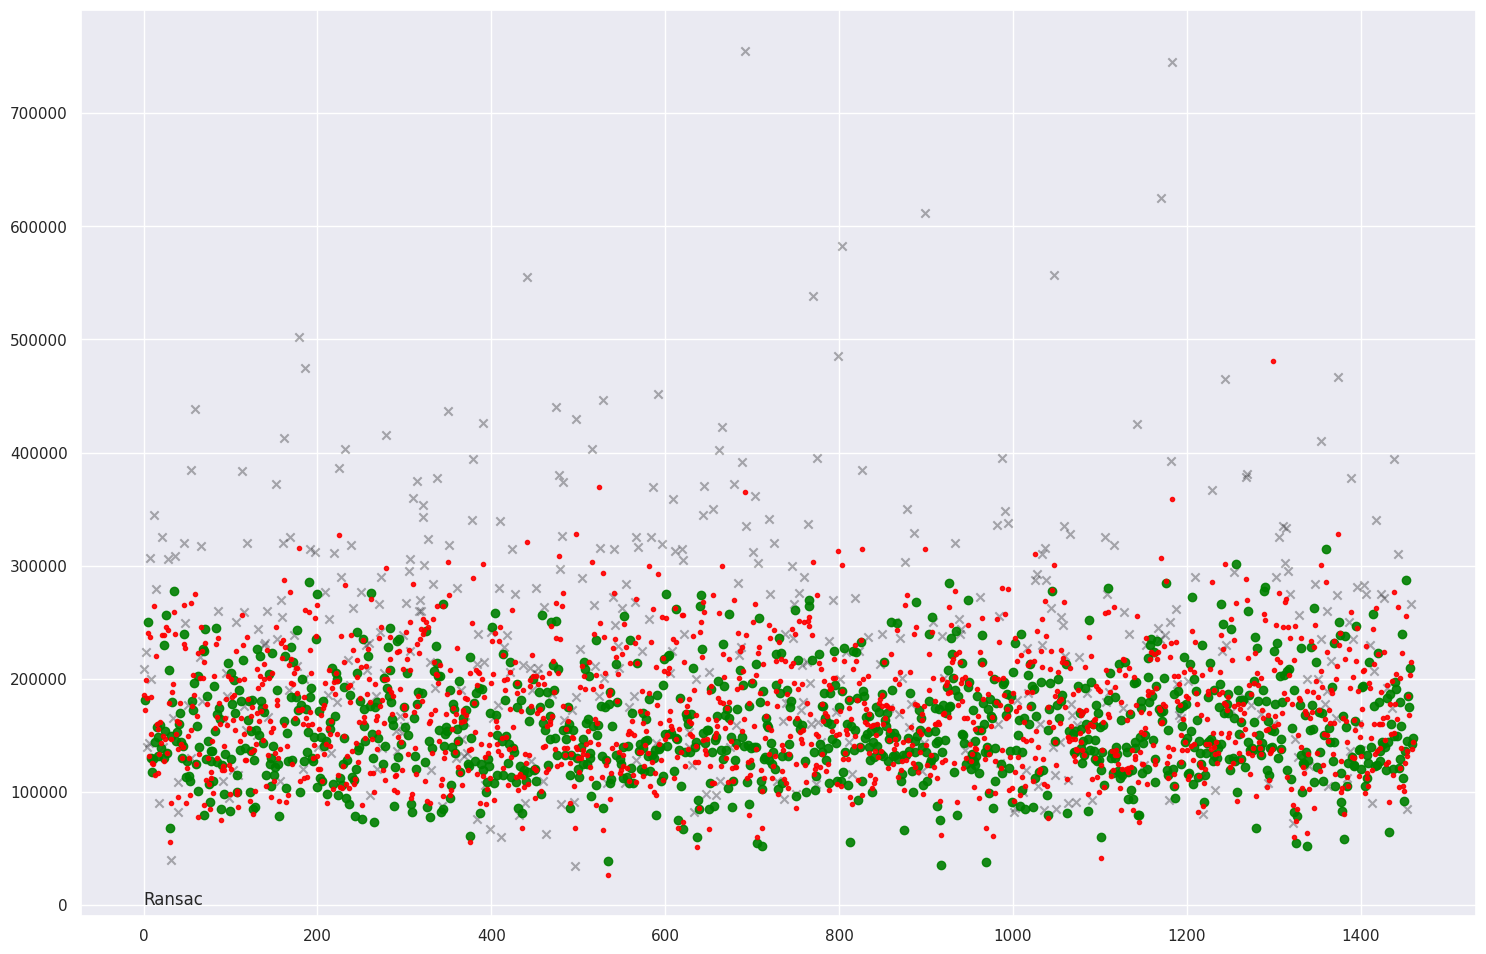

[ 64291.00442864 121088.37639767  35950.4699393    4852.29997714
  39596.59849048 -21427.68157829  47585.89275665  27191.22091976
 130241.99475606 -20104.73391335 -16368.98837287  16318.31737897
  12943.19913184  30668.20410203  16448.02961132]


In [123]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
df_regr=df_kritikus_no_outliers
numofvariables=40
kritical=All_Variable



#Ransac
ransacreg = linear_model.RANSACRegressor()
ransacreg.fit(df_norm[kritical[2:numofvariables]], df_norm[kritical[1]])
#print(ransacreg.is_model_valid)
#print("Ransac reg koefficiensei:",ransacreg.coef_)
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


ransacpred=ransacreg.predict(df_norm[kritical[2:numofvariables]])
print(len(ransacpred))

plt.figure(figsize=(18,12))


plt.subplot(111)
plt.scatter(df["Id"][outlier_mask],df["SalePrice"][outlier_mask],c="black",alpha=0.3,marker="x")
plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"Ransac")

print(len(ransacpred))
plt.show()
print( ransacreg.estimator_.coef_)

In [107]:
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
count=0
countT=0
countF=0
for i in inlier_mask:
    if i:
        print("#",end="")
        countT+=1
    else:
        print("O",end="")
        countF+=1
    count+=1
    if count == 50:
        count=0
        print("\n", end="")

print(f"\n\n\nA Ransac módszer kidobált még {countF} darab adatot a {countT+countF} darabból !! ")

###OO######OOO#######O##OO###O######O####O#####OO#
##O###O#O###O###O##O#####O#########O#####O#O######
#######OOO##OO#######O###O#####O###O#O#O####O#O###
OO#######O#O#OOOO##O####OOO#O##O###O##O#######OOO#
O#####O#O##O######O######OO##############OO###OO#O
##########OO#####O#######O##OO##############O###O#
O########O###O#O##O#####O##OO#O#O###O###O#######OO
#O####O#O###OO#############O#####O#####O#O#O##O###
##OO##O##OO######O#####O##O####O##O#####O#O##O##OO
#O###O#O########O#O#O##O#####O#O#######OOO######O#
###O####O####O##OO#OO#OO###OOOOO#O#######O###OO###
##OO#########OOO#O##O#######O##OOO#O##O##O##O##O##
#######O######O#O####O##O##OO##OO#OOO##O##O#O#O#OO
#######OO##OOOO#O#####OO##OO##O###OOO#O##O####O#O#
#O###OO###O#####O#######O###O#########O#OO#OO#####
#######O#O#O#######O##O#O##OO#####O#############O#
###O##OO#O##OO####O###O###O#O####O#OO####O#O#####O
###O##O######OO#O#O###########OO#O#OO##O#####OOOO#
#O########O##O#####O#####O#O##O###O####OO#OOOOO###
####OO####O##########O####OO###

# **nézzünk egy jóságot**


In [151]:
print(df_minimal.head())
delta_inlist=[]
delta_outlist=[]

h=len(df_minimal["Id"])
for i in range(h):
    deltapercent=(df_minimal.iloc[i,1]-ransacpred[i])/df_minimal.iloc[i,1]*100
    if inlier_mask[i]:
        deltapercent=(df_minimal.iloc[i,1]-ransacpred[i])/df_minimal.iloc[i,1]*100
        delta_inlist.append(deltapercent)
        print(f" {i} --> {df_minimal.iloc[i,1]:0.0f} --> {df_minimal.iloc[i,1]-ransacpred[i]:0.0f} --> {deltapercent:0.1f}")
    else:
        print(i,"OutLier")
        delta_outlist.append(deltapercent)
        

   Id  SalePrice  OverallQual  ...  TotRmsAbvGrd  YearBuilt  FireplaceQu
0   1     208500            7  ...             8       2003            0
1   2     181500            6  ...             6       1976            3
2   3     223500            7  ...             6       2001            3
3   4     140000            7  ...             7       1915            4
4   5     250000            8  ...             9       2000            3

[5 rows x 17 columns]
0 OutLier
 1 --> 181500 --> 9166 --> 5.1
2 OutLier
3 OutLier
 4 --> 250000 --> 9406 --> 3.8
5 OutLier
6 OutLier
7 OutLier
 8 --> 129900 --> -21242 --> -16.4
 9 --> 118000 --> -7746 --> -6.6
 10 --> 129500 --> 4516 --> 3.5
11 OutLier
 12 --> 144000 --> 29150 --> 20.2
13 OutLier
 14 --> 157000 --> -3126 --> -2.0
 15 --> 132000 --> 14864 --> 11.3
 16 --> 149000 --> -6786 --> -4.6
17 OutLier
 18 --> 159000 --> -3232 --> -2.0
 19 --> 139000 --> -4187 --> -3.0
20 OutLier
21 OutLier
 22 --> 230000 --> -8455 --> -3.7
 23 --> 129900 --> 2526 

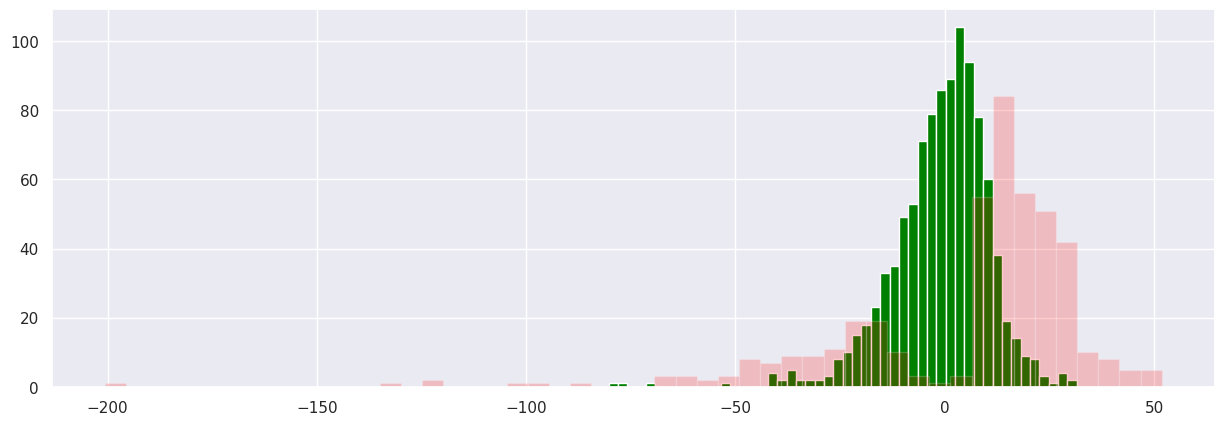

In [161]:
#print(deltalist)
plt.figure(figsize=(15,5))
plt.hist(delta_inlist, bins=50,color="green")
plt.hist(delta_outlist, bins=50,color="red",alpha=0.2 );
